In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import mdtraj.io as io
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
def pos_phase(X,n_inp,n_hid,last_RBM=False):
    print "data.shape:", X.shape
#    w = 0.1 * np.random.random((n_inp,n_hid))
    w = np.random.normal(loc=0.0,scale=0.1,size=(n_inp,n_hid))
    v = np.zeros((1,n_inp))
    h = np.zeros((1,n_hid))
    new_w = np.zeros((n_inp,n_hid))
    new_v = np.zeros((1,n_inp))
    new_h = np.zeros((1,n_hid))
    batchposhidprobs = np.zeros((X.shape[0],n_hid));
    
    for e in range(epochs):
        err_sum = 0
        if e > 5 : p = p_final
        else : p = p_init
        for ii in range(int(X.shape[0]/batch_size)):
            epoch_x = X[ii*batch_size:ii*batch_size+batch_size,:]
            data = epoch_x

            if last_RBM:  pos_hid = np.dot(data,w) + h
            else: pos_hid = 1.0 / (1 + np.exp(np.dot(-data,w) - h))
            batchposhidprobs[ii*batch_size:ii*batch_size+batch_size,:] = pos_hid
            pos_prod = np.dot(data.T, pos_hid)

            pos_hid_act = np.sum(pos_hid,axis = 0)
            pos_vis_act = np.sum(data, axis = 0 ) 
        
            
            if last_RBM:
                pos_hid_binary = (pos_hid + np.random.random((pos_hid.shape))).astype(int)
                neg_data = 1.0/ (1 + np.exp(np.dot(-pos_hid_binary,w.T) - v))
                neg_hid =  np.dot(neg_data,w) + h
            else: 
                pos_hid_binary = (pos_hid > np.random.random((pos_hid.shape))).astype(int)
                neg_data = 1.0/ (1 + np.exp(np.dot(-pos_hid_binary,w.T) - v))
                neg_hid =  1.0/ (1 + np.exp(np.dot(-neg_data,w) - h))
                
            neg_prod = np.dot(neg_data.T,neg_hid)
            neg_hid_act = np.sum(neg_hid, axis = 0)
            neg_vis_act = np.sum(neg_data, axis = 0)

            err = np.sum(np.sum(data - neg_data)**2)
            err_sum += err

            new_w = p * new_w + (e_w * ( (pos_prod - neg_prod) / float(n_classes) - w_decay * w))
            new_v = p * new_v + (e_v * (pos_vis_act - neg_vis_act) / float(n_classes))
            new_h = p * new_h + (e_h * (pos_hid_act - neg_hid_act) / float(n_classes))

            w = w + new_w
            v = v + new_v
            h = h + new_h
        if e % 5 == 0 or e == epochs - 1: print "epoch:%d,    \terror:%1.2e" %(e,err_sum)
    print "shapes:, w, v, h", w.shape, v.shape, h.shape
    print "batchposhidprobs: min,max", np.min(batchposhidprobs), np.max(batchposhidprobs)
    return w,v,h, batchposhidprobs


In [4]:
epochs = 50
e_w = 0.01
e_v = 0.01
e_h = 0.01
w_decay = 0.00002
p_init = 0.5
p_final = 0.9
batch_size = 100
n_classes = batch_size
x1 = mnist.train.images
print "inp_data: min, max", np.min(x1), np.max(x1)
W1,V1,H1, proj_data = pos_phase(x1,784,1000,last_RBM=False)        ; print "proj_data.shape:", proj_data.shape
e_w = 0.001
e_v = 0.001
e_h = 0.001
W2,V2,H2, proj_data = pos_phase(proj_data,1000,500,last_RBM=False) ; print "proj_data.shape:", proj_data.shape
W3,V3,H3, proj_data = pos_phase(proj_data,500,250,last_RBM=False)  ; print "proj_data.shape:", proj_data.shape
W4,V4,H4, proj_data = pos_phase(proj_data,250,2,last_RBM=True)    ; print "proj_data.shape:", proj_data.shape

inp_data: min, max 0.0 1.0
data.shape: (55000, 784)
epoch:0,    	error:1.58e+09
epoch:5,    	error:3.37e+07
epoch:10,    	error:7.64e+06
epoch:15,    	error:4.94e+06
epoch:20,    	error:5.00e+06
epoch:25,    	error:4.83e+06
epoch:30,    	error:4.73e+06
epoch:35,    	error:4.17e+06
epoch:40,    	error:4.16e+06
epoch:45,    	error:3.91e+06
epoch:49,    	error:3.41e+06
shapes:, w, v, h (784, 1000) (1, 784) (1, 1000)
batchposhidprobs: min,max 2.16682825525e-15 0.999999999999
proj_data.shape: (55000, 1000)
data.shape: (55000, 1000)
epoch:0,    	error:4.28e+09
epoch:5,    	error:1.50e+08
epoch:10,    	error:3.85e+07
epoch:15,    	error:2.31e+07
epoch:20,    	error:1.78e+07
epoch:25,    	error:1.60e+07
epoch:30,    	error:1.41e+07
epoch:35,    	error:1.35e+07
epoch:40,    	error:1.11e+07
epoch:45,    	error:1.10e+07
epoch:49,    	error:1.04e+07
shapes:, w, v, h (1000, 500) (1, 1000) (1, 500)
batchposhidprobs: min,max 1.60915076703e-08 0.99999985957
proj_data.shape: (55000, 500)
data.shape: (5

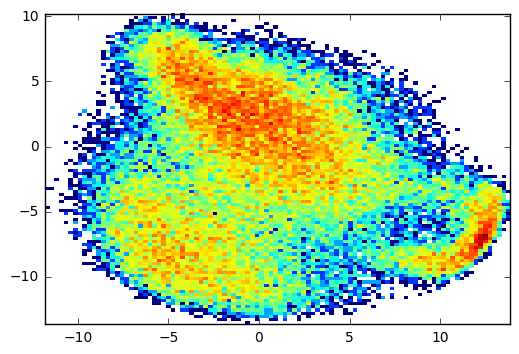

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.hist2d(proj_data[:,0],proj_data[:,1],bins=100, norm=LogNorm())
plt.show()

(55000, 2)


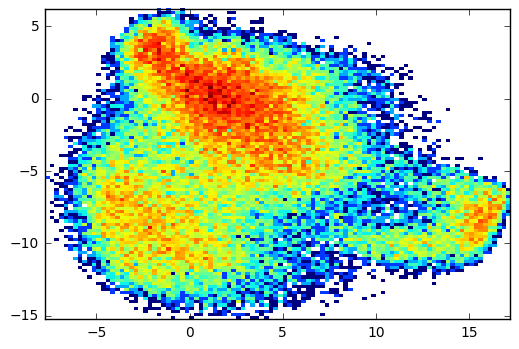

In [6]:
def sigmoid(x):
    return 1.0/ (1 + np.exp(-x))
x1 = sigmoid(np.dot(mnist.train.images,W1))
x2 = sigmoid(np.dot(x1,W2))
x3 = sigmoid(np.dot(x2,W3))
x4 = np.dot(x3,W4)
print x4.shape
plt.hist2d(x4[:,0],x4[:,1],bins=100, norm=LogNorm())
plt.show()

In [7]:
#tf.Variable?
print "shapes: W1, W2, W3, W4:", W1.shape, W2.shape, W3.shape, W4.shape
print "shapes: V1, V2, V3, V4:", V1.shape, V2.shape, V3.shape, V4.shape
print "shapes: H1, H2, H3, H4:", H1.shape, H2.shape, H3.shape, H4.shape

shapes: W1, W2, W3, W4: (784, 1000) (1000, 500) (500, 250) (250, 2)
shapes: V1, V2, V3, V4: (1, 784) (1, 1000) (1, 500) (1, 250)
shapes: H1, H2, H3, H4: (1, 1000) (1, 500) (1, 250) (1, 2)


In [8]:
def finetune_nn(data, w1,w2,w3,w4, V1, V2, V3, V4, H1, H2, H3, H4):
    w1 = w1.astype(np.float32)
    w2 = w2.astype(np.float32)
    w3 = w3.astype(np.float32)
    w4 = w4.astype(np.float32)
    
#    tt = tf.float32
#    b1, b2, b3, b4 = tf.zeros((w1.shape[1],),dtype=tt), tf.zeros((w2.shape[1],),dtype=tt), tf.zeros((w3.shape[1],),dtype=tt), tf.zeros((w4.shape[1],),dtype=tt)
#    br1, br2, br3, br4 = tf.zeros((w1.shape[0],),dtype=tt), tf.zeros((w2.shape[0],),dtype=tt), tf.zeros((w3.shape[0],),dtype=tt), tf.zeros((w4.shape[0],),dtype=tt)

    H1, H2, H3, H4 = H1.flatten(), H2.flatten(), H3.flatten(), H4.flatten()
    V1, V2, V3, V4 = V1.flatten(), V2.flatten(), V3.flatten(), V4.flatten()
    
    H1, H2, H3, H4 = H1.astype(np.float32), H2.astype(np.float32), H3.astype(np.float32), H4.astype(np.float32)
    V1, V2, V3, V4 = V1.astype(np.float32), V2.astype(np.float32), V3.astype(np.float32), V4.astype(np.float32)
    b1, b2, b3, b4 = H1, H2, H3, H4
    br1, br2, br3, br4 = V1, V2, V3, V4

    theta1 = {'weights':tf.Variable(w1, name='w1'), 'biases1':tf.Variable(b1,name='b1'), 'biases2':tf.Variable(br1,name='b1')}
    theta2 = {'weights':tf.Variable(w2, name='w2'), 'biases1':tf.Variable(b2,name='b2'), 'biases2':tf.Variable(br2,name='b1')}
    theta3 = {'weights':tf.Variable(w3, name='w3'), 'biases1':tf.Variable(b3,name='b3'), 'biases2':tf.Variable(br3,name='b1')}
    theta4 = {'weights':tf.Variable(w4, name='w4'), 'biases1':tf.Variable(b4,name='b4'), 'biases2':tf.Variable(br4,name='b1')}
        
    print "types: b1, w1, data:", type(b1), type(theta1['weights']), type(data)

        
    l1 = tf.add(tf.matmul(data,theta1['weights']), theta1['biases1']) ; l1 = tf.nn.sigmoid(l1) #; l1 = tf.nn.dropout(l1,0.5)   #relu doesn't work well
    l2 = tf.add(tf.matmul(l1,theta2['weights']), theta2['biases1']) ; l2 = tf.nn.sigmoid(l2)
    l3 = tf.add(tf.matmul(l2,theta3['weights']), theta3['biases1']) ; l3 = tf.nn.sigmoid(l3)
    l4 = tf.add(tf.matmul(l3,theta4['weights']), theta4['biases1']) #; l4 = tf.nn.sigmoid(l4)  # this should be linear
     
    l5 = tf.add(tf.matmul(l4,tf.transpose(theta4['weights'])), theta4['biases2'])   ; l5 = tf.nn.sigmoid(l5) #; l8 = tf.nn.dropout(l8,0.5)
    l6 = tf.add(tf.matmul(l5,tf.transpose(theta3['weights'])), theta3['biases2'])   ; l6 = tf.nn.sigmoid(l6)
    l7 = tf.add(tf.matmul(l6,tf.transpose(theta2['weights'])), theta2['biases2'])   ; l7 = tf.nn.sigmoid(l7)
    l8 = tf.add(tf.matmul(l7,tf.transpose(theta1['weights'])), theta1['biases2'])   ; l8 = tf.nn.sigmoid(l8)
    
    print "l8.shape:", l8.shape
    return l4, l8

types: b1, w1, data: <type 'numpy.ndarray'> <class 'tensorflow.python.ops.variables.Variable'> <class 'tensorflow.python.framework.ops.Tensor'>
l8.shape: (?, 784)
x.shape, predictions.shape (?, 784) (?, 784)
cost.shape ()
('Epoch', 1, 'completed out of', 200, 'loss:', 3994.0630064808238)
('Epoch', 2, 'completed out of', 200, 'loss:', 3536.6531902521306)
('Epoch', 3, 'completed out of', 200, 'loss:', 3329.2766508345171)
('Epoch', 4, 'completed out of', 200, 'loss:', 3200.8045423473013)
('Epoch', 5, 'completed out of', 200, 'loss:', 3108.1546781782672)
('Epoch', 6, 'completed out of', 200, 'loss:', 3037.2833966619319)
('Epoch', 7, 'completed out of', 200, 'loss:', 2985.3480606356534)
('Epoch', 8, 'completed out of', 200, 'loss:', 2938.8354221413351)
('Epoch', 9, 'completed out of', 200, 'loss:', 2903.3117671342329)
('Epoch', 10, 'completed out of', 200, 'loss:', 2873.8938609730112)
('Epoch', 11, 'completed out of', 200, 'loss:', 2848.9682408558238)
('Epoch', 12, 'completed out of', 200, 

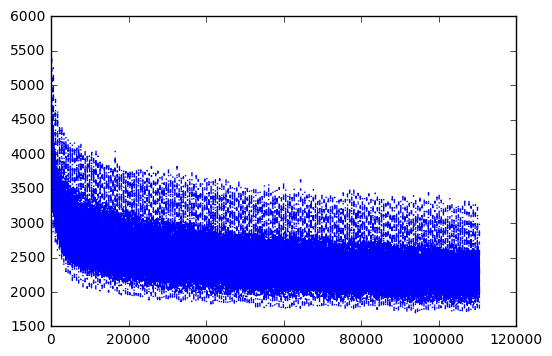

In [9]:
hm_epochs = 200
tf.reset_default_graph()

data = mnist.train.images
x = tf.placeholder('float', [None, data.shape[1]])
y = tf.placeholder('float')

encoded, prediction = finetune_nn(x,W1,W2,W3,W4, V1, V2, V3, V4, H1, H2, H3, H4)

cost = tf.reduce_sum((prediction - x)**2)

print "x.shape, predictions.shape", x.shape, prediction.shape
print "cost.shape", cost.shape


optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
#optimizer = tf.train.MomentumOptimizer(learning_rate=0.001,momentum=0.1).minimize(cost)
#optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(cost)
#optimizer = tf.train.FtrlOptimizer(learning_rate=0.001).minimize(cost)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
#optimizer = tf.train.AdagradOptimizer(0.1).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_t = []
for epoch in range(hm_epochs+1):
    epoch_loss = 0
    for i in range(int(data.shape[0]/batch_size)):
        epoch_x = data[i*batch_size:i*batch_size+batch_size,:]
        _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_x})
        epoch_loss += c
        cost_t.append(c)
    if epoch % 1 == 0: print('Epoch', epoch + 1, 'completed out of',hm_epochs,'loss:',epoch_loss / float(data.shape[0]/batch_size))

plt.plot(np.array(cost_t),'-.')
plt.show()

In [17]:
# hm_epochs = 100
# for epoch in range(hm_epochs+1):
#     epoch_loss = 0
#     for i in range(int(data.shape[0]/batch_size)):
#         epoch_x = data[i*batch_size:i*batch_size+batch_size,:]
#         _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_x})
#         epoch_loss += c
#         cost_t.append(c)
#     if epoch % 1 == 0: print('Epoch', epoch + 1, 'completed out of',hm_epochs,'loss:',epoch_loss / float(data.shape[0]/batch_size))

# plt.plot(np.array(cost_t),'-.')
# plt.show()

In [10]:
tf.trainable_variables()

[<tf.Variable 'w1:0' shape=(784, 1000) dtype=float32_ref>,
 <tf.Variable 'b1:0' shape=(1000,) dtype=float32_ref>,
 <tf.Variable 'b1_1:0' shape=(784,) dtype=float32_ref>,
 <tf.Variable 'w2:0' shape=(1000, 500) dtype=float32_ref>,
 <tf.Variable 'b2:0' shape=(500,) dtype=float32_ref>,
 <tf.Variable 'b1_2:0' shape=(1000,) dtype=float32_ref>,
 <tf.Variable 'w3:0' shape=(500, 250) dtype=float32_ref>,
 <tf.Variable 'b3:0' shape=(250,) dtype=float32_ref>,
 <tf.Variable 'b1_3:0' shape=(500,) dtype=float32_ref>,
 <tf.Variable 'w4:0' shape=(250, 2) dtype=float32_ref>,
 <tf.Variable 'b4:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'b1_4:0' shape=(250,) dtype=float32_ref>]

In [11]:
ww1 = sess.run(tf.trainable_variables()[0])
ww2 = sess.run(tf.trainable_variables()[3])
ww3 = sess.run(tf.trainable_variables()[6])
ww4 = sess.run(tf.trainable_variables()[9])
print "shapes: ww1, ww2, ww3, ww4:", ww1.shape, ww2.shape, ww3.shape, ww4.shape

shapes: ww1, ww2, ww3, ww4: (784, 1000) (1000, 500) (500, 250) (250, 2)


In [12]:
xx1 = np.dot(mnist.train.images,ww1)
xx2 = np.dot(xx1,ww2)
xx3 = np.dot(xx2,ww3)
xx4 = np.dot(xx3,ww4)
print "xx4.shape:", xx4.shape

xxx1 = sigmoid(np.dot(mnist.train.images,ww1))
xxx2 = sigmoid(np.dot(xxx1,ww2))
xxx3 = sigmoid(np.dot(xxx2,ww3))
xxx4 = np.dot(xxx3,ww4)
print "xx4.shape:", xxx4.shape

xx4.shape: (55000, 2)
xx4.shape: (55000, 2)


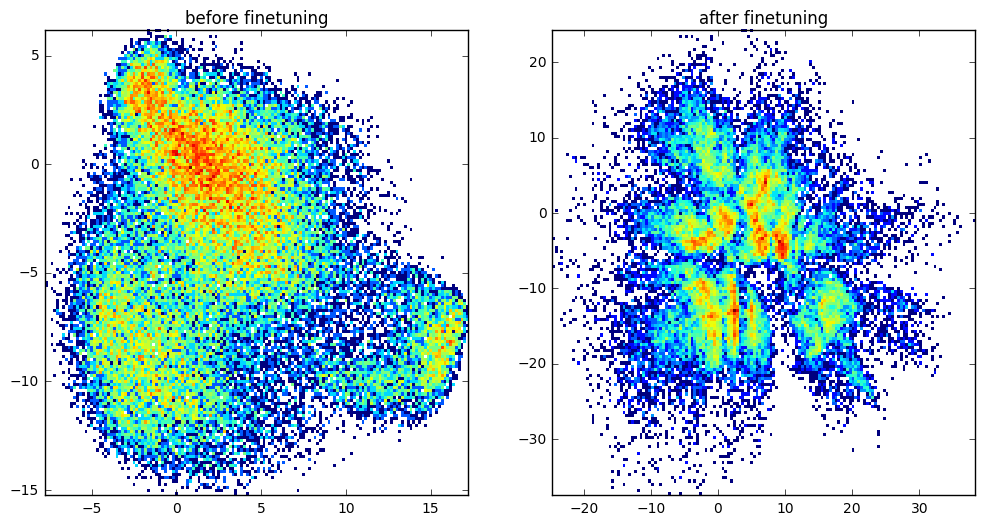

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist2d(x4[:,0],x4[:,1],bins=150, norm=LogNorm()) ; plt.title('before finetuning')
plt.subplot(122)
plt.hist2d(xxx4[:,0],xxx4[:,1],bins=150, norm=LogNorm()) ; plt.title('after finetuning')
plt.show()

data.shape, labels.shape: (55000, 2) (55000,)
0 (5444, 2) [0 0 0 0 0 0 0 0 0 0]
1 (6179, 2) [1 1 1 1 1 1 1 1 1 1]
2 (5470, 2) [2 2 2 2 2 2 2 2 2 2]
3 (5638, 2) [3 3 3 3 3 3 3 3 3 3]
4 (5307, 2) [4 4 4 4 4 4 4 4 4 4]
5 (4987, 2) [5 5 5 5 5 5 5 5 5 5]
6 (5417, 2) [6 6 6 6 6 6 6 6 6 6]
7 (5715, 2) [7 7 7 7 7 7 7 7 7 7]
8 (5389, 2) [8 8 8 8 8 8 8 8 8 8]
9 (5454, 2) [9 9 9 9 9 9 9 9 9 9]


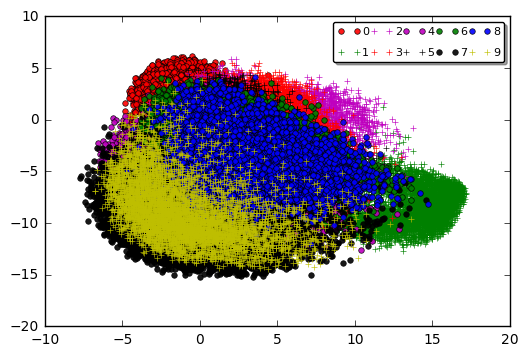

In [14]:
def plot(data,labels):
    labels = np.array(labels)
#    fmts = ['ro','go','m^','r^','mo','k^','g^','ko','bo','y^']
    fmts = ['ro','g+','m+','r+','mo','+k','go','ko','bo','y+','yo']
    print "data.shape, labels.shape:", data.shape, labels.shape             # (2,60000)
    inds = np.random.choice(range(data.shape[1]),10000)
    for i in range(10):
        ind = (labels == i) 
        dat_i = data[ind]
        print i, dat_i.shape, labels[ind][0:10]
        plt.plot(dat_i[:,0],dat_i[:,1],fmts[i],alpha=0.9,markersize=4)
    plt.legend(range(10),ncol=5,fontsize=8,labelspacing=1,columnspacing=0.1,handletextpad=0.2,shadow=True,fancybox=True,loc='best')#bbox_to_anchor=(1.00,1.11))
    plt.show()

#rint mnist.train.labels.argmax(axis=1).shape
#print mnist.train.labels[0:10]
#print mnist.train.labels.argmax(axis=1)[0:10]
plot(x4,mnist.train.labels.argmax(axis=1))

data.shape, labels.shape: (55000, 2) (55000,)
0 (5444, 2) [0 0 0 0 0 0 0 0 0 0]
1 (6179, 2) [1 1 1 1 1 1 1 1 1 1]
2 (5470, 2) [2 2 2 2 2 2 2 2 2 2]
3 (5638, 2) [3 3 3 3 3 3 3 3 3 3]
4 (5307, 2) [4 4 4 4 4 4 4 4 4 4]
5 (4987, 2) [5 5 5 5 5 5 5 5 5 5]
6 (5417, 2) [6 6 6 6 6 6 6 6 6 6]
7 (5715, 2) [7 7 7 7 7 7 7 7 7 7]
8 (5389, 2) [8 8 8 8 8 8 8 8 8 8]
9 (5454, 2) [9 9 9 9 9 9 9 9 9 9]


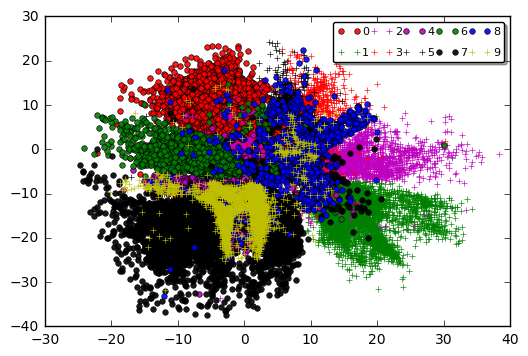

In [15]:
plot(xxx4,mnist.train.labels.argmax(axis=1))

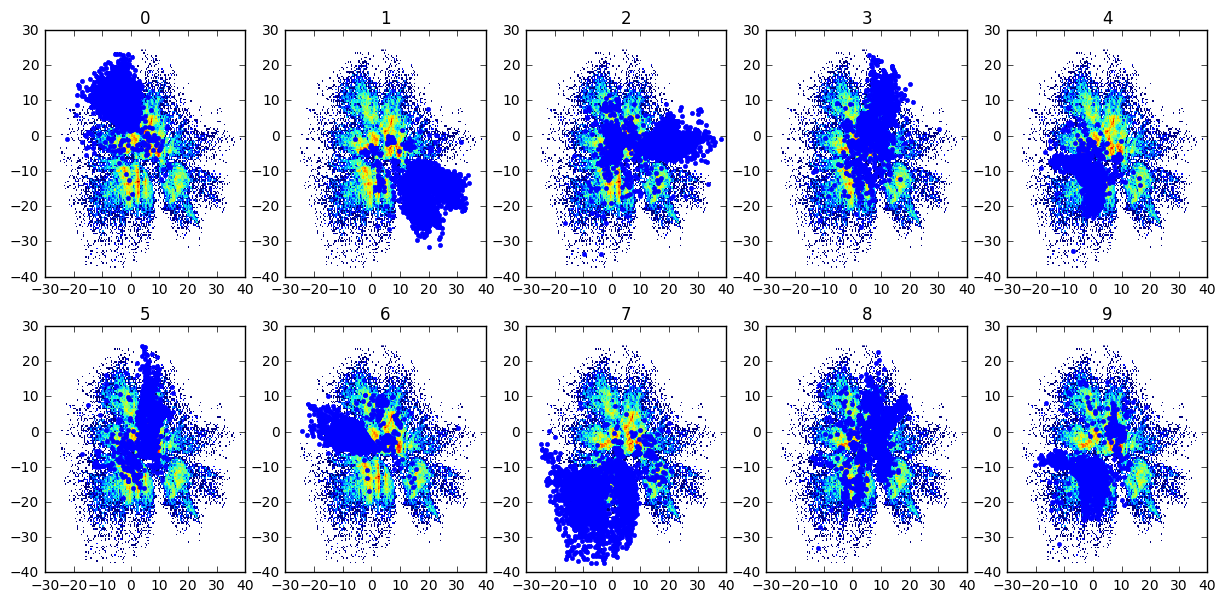

In [17]:
labels = mnist.train.labels.argmax(axis=1)
plt.figure(figsize=(15,7))
for i in range(10):
    ind = (labels == i) 
    dat_i = xxx4[ind]
    plt.subplot(2,5,i+1)
    plt.hist2d(xxx4[:,0],xxx4[:,1],bins=150,norm=LogNorm())
    plt.plot(dat_i[:,0],dat_i[:,1],'.')
    plt.xlim([-30,40])
    plt.ylim([-40,30])
    plt.title(i)
plt.show()

0 (980, 784) (980, 2)
1 (1135, 784) (1135, 2)
2 (1032, 784) (1032, 2)
3 (1010, 784) (1010, 2)
4 (982, 784) (982, 2)
5 (892, 784) (892, 2)
6 (958, 784) (958, 2)
7 (1028, 784) (1028, 2)
8 (974, 784) (974, 2)
9 (1009, 784) (1009, 2)


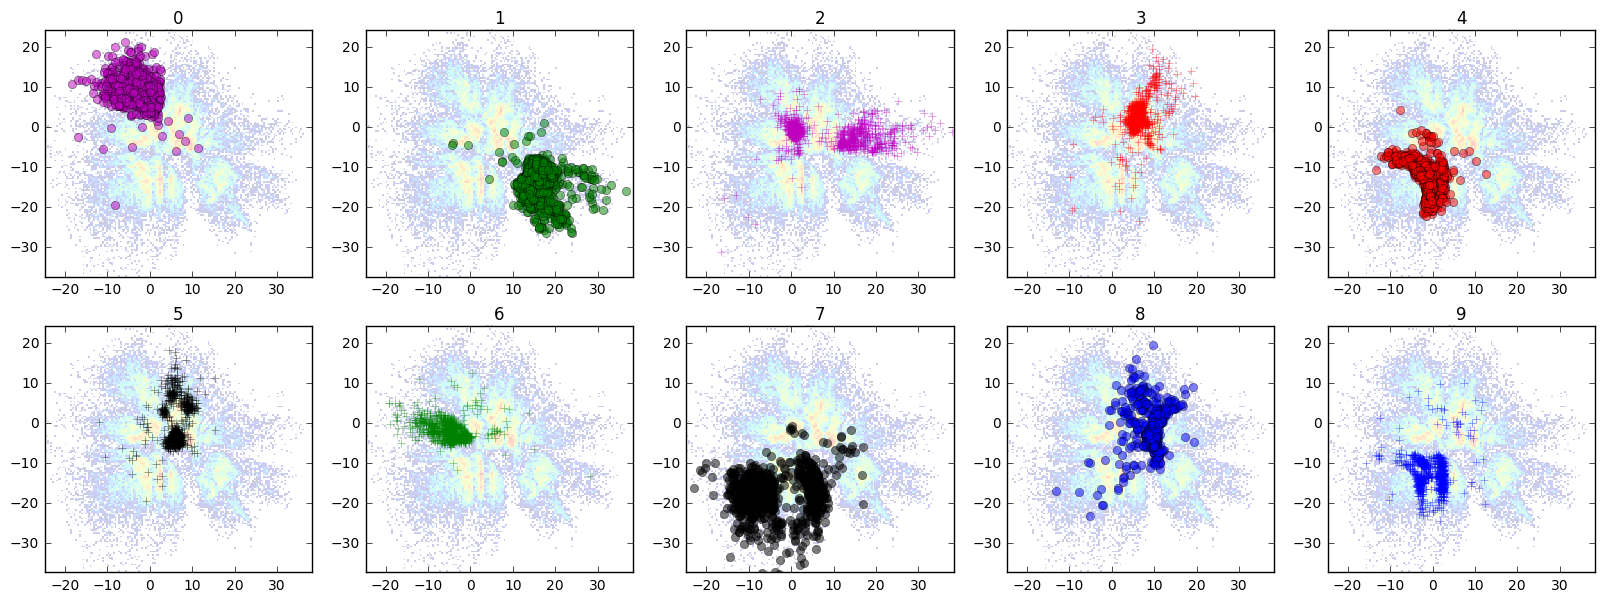

In [18]:
import scipy.io as ioo

def project(data):
    p1 = sigmoid(np.dot(data,ww1))
    p1 = sigmoid(np.dot(p1,ww2))
    p1 = sigmoid(np.dot(p1,ww3))
    p1 = np.dot(p1,ww4)
    return p1

def plot_after_ft_one_by_one():
    fmts = ['mo','go','m+','r+','ro','+k','g+','ko','bo','b+','yo']
    for i in range(10):
        plt.subplot(2,5,i+1)
        dd = ioo.loadmat('/Users/asr2031/Dropbox/papers/ANNs/unsupervised/reducing_dimensions_by_nn/code/mnist_data/test%d.mat' %i)['D']
        pp = project(dd)
        print i, dd.shape, pp.shape
        plt.plot(pp[:,0],pp[:,1],fmts[i],alpha=0.5)
        plt.title(i)
        plt.xlim([-30,40])
        plt.ylim([-40,30])
        plt.hist2d(xxx4[:,0],xxx4[:,1],bins=150,norm=LogNorm(),alpha=0.2)

plt.figure(figsize=(20,7))
plot_after_ft_one_by_one()
plt.show()